In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data


# Combine the data into a single dataset


# Display the data table for preview



Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites       Drug
0     b128          0                45.0                 0  Capomulin
1     f932          0                45.0                 0   Ketapril
2     g107          0                45.0                 0   Ketapril
3     a457          0                45.0                 0   Ketapril
4     c819          0                45.0                 0   Ketapril

In [75]:
#Code
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

data1 = pd.read_csv(mouse_drug_data_to_load)
data2 = pd.read_csv(clinical_trial_data_to_load)
#Combine by Mouse ID
same_variable=[c for c in data1.columns if c in data2.columns][0]


merged=data1.join(data2.set_index(same_variable), on=same_variable).reset_index()
merged=merged.drop('index',axis=1)
merged

Mouse ID      Drug  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0        f234  Stelasyn          0           45.000000                 0
1        f234  Stelasyn          5           47.313491                 0
2        f234  Stelasyn         10           47.904324                 0
3        f234  Stelasyn         15           48.735197                 1
4        f234  Stelasyn         20           51.112713                 2
...       ...       ...        ...                 ...               ...
1901     j235   Placebo          0           45.000000                 0
1902     j235   Placebo          5           46.588820                 0
1903     j235   Placebo         10           48.018788                 1
1904     j235   Placebo         15           51.161138                 1
1905     j235   Placebo         20           52.942902                 1

[1906 rows x 5 columns]

## Tumor Response to Treatment
1. I have to get the Mean of Tumor volume per Medicine
2. I have to groupby the variables Drug and Timepoint

In [64]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame
df1=merged.groupby(['Drug', 'Timepoint']).mean()
mean_df=df1.drop("Metastatic Sites", axis=1).reset_index()

Drug  Timepoint  Tumor Volume (mm3)
0   Capomulin          0           45.000000
1   Capomulin          5           44.266086
2   Capomulin         10           43.084291
3   Capomulin         15           42.064317
4   Capomulin         20           40.716325
5   Capomulin         25           39.939528
6   Capomulin         30           38.769339
7   Capomulin         35           37.816839
8   Capomulin         40           36.958001
9   Capomulin         45           36.236114
10   Ceftamin          0           45.000000
11   Ceftamin          5           46.503051
12   Ceftamin         10           48.285125
13   Ceftamin         15           50.094055
14   Ceftamin         20           52.157049
15   Ceftamin         25           54.287674
16   Ceftamin         30           56.769517
17   Ceftamin         35           58.827548
18   Ceftamin         40           61.467895
19   Ceftamin         45           64.132421
20  Infubinol          0           45.000000
21  Infubinol          5           47.062001
22  Infubinol         10           49.403909
23  Infubinol         15           51.296397
24  Infubinol         20           53.197691
25  Infubinol         25           55.715252
26  Infubinol         30           58.299397
27  Infubinol         35           60.742461
28  Infubinol         40           63.162824
29  Infubinol         45           65.755562
..        ...        ...                 ...
70   Ramicane          0           45.000000
71   Ramicane          5           43.944859
72   Ramicane         10           42.531957
73   Ramicane         15           41.495061
74   Ramicane         20           40.238325
75   Ramicane         25           38.974300
76   Ramicane         30           38.703137
77   Ramicane         35           37.451996
78   Ramicane         40           36.574081
79   Ramicane         45           34.955595
80   Stelasyn          0           45.000000
81   Stelasyn          5           47.527452
82   Stelasyn         10           49.463844
83   Stelasyn         15           51.529409
84   Stelasyn         20           54.067395
85   Stelasyn         25           56.166123
86   Stelasyn         30           59.826738
87   Stelasyn         35           62.440699
88   Stelasyn         40           65.356386
89   Stelasyn         45           68.438310
90  Zoniferol          0           45.000000
91  Zoniferol          5           46.851818
92  Zoniferol         10           48.689881
93  Zoniferol         15           50.779059
94  Zoniferol         20           53.170334
95  Zoniferol         25           55.432935
96  Zoniferol         30           57.713531
97  Zoniferol         35           60.089372
98  Zoniferol         40           62.916692
99  Zoniferol         45           65.960888

[100 rows x 3 columns]

In [65]:
df1=merged.groupby(['Drug', 'Timepoint']).mean()
mean_df=df1.drop("Metastatic Sites", axis=1).reset_index()
mean_df


Drug  Timepoint  Tumor Volume (mm3)
0   Capomulin          0           45.000000
1   Capomulin          5           44.266086
2   Capomulin         10           43.084291
3   Capomulin         15           42.064317
4   Capomulin         20           40.716325
..        ...        ...                 ...
95  Zoniferol         25           55.432935
96  Zoniferol         30           57.713531
97  Zoniferol         35           60.089372
98  Zoniferol         40           62.916692
99  Zoniferol         45           65.960888

[100 rows x 3 columns]

In [81]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

combined_sem = merged.groupby(['Drug','Timepoint']).sem()
combined_sem= combined_sem.drop('Metastatic Sites', axis=1).reset_index()
combined_sem= combined_sem.drop('Mouse ID', axis=1).reset_index()
# Convert to DataFrame
tumor_sem_df = pd.DataFrame(combined_sem)
# Preview DataFrame
tumor_sem_df.head()

# Convert to DataFrame

# Preview DataFrame



index       Drug  Timepoint  Tumor Volume (mm3)
0      0  Capomulin          0            0.000000
1      1  Capomulin          5            0.448593
2      2  Capomulin         10            0.702684
3      3  Capomulin         15            0.838617
4      4  Capomulin         20            0.909731

In [78]:
std_err_tv_df = df1.sem()["Tumor Volume (mm3)"]
std_err_tv_df

0.8980673775157741

Drug  Timepoint  Tumor Volume (mm3)
0  Capomulin          0            0.000000
1  Capomulin          5            0.448593
2  Capomulin         10            0.702684
3  Capomulin         15            0.838617
4  Capomulin         20            0.909731

In [30]:
# Minor Data Munging to Re-Format the Data Frames


# Preview that Reformatting worked


In [88]:
pivot_df = mean_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
pivot_df.reset_index(level = None, inplace = True)
pivot_df

Drug  Timepoint  Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol  \
0             0  45.000000  45.000000  45.000000  45.000000  45.000000   
1             5  44.266086  46.503051  47.062001  47.389175  46.796098   
2            10  43.084291  48.285125  49.403909  49.582269  48.694210   
3            15  42.064317  50.094055  51.296397  52.399974  50.933018   
4            20  40.716325  52.157049  53.197691  54.920935  53.644087   
5            25  39.939528  54.287674  55.715252  57.678982  56.731968   
6            30  38.769339  56.769517  58.299397  60.994507  59.559509   
7            35  37.816839  58.827548  60.742461  63.371686  62.685087   
8            40  36.958001  61.467895  63.162824  66.068580  65.600754   
9            45  36.236114  64.132421  65.755562  70.662958  69.265506   

Drug    Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
0     45.000000  45.000000  45.000000  45.000000  45.000000  
1     47.125589  47.248967  43.944859  47.527452  46.851818  
2     49.423329  49.101541  42.531957  49.463844  48.689881  
3     51.359742  51.067318  41.495061  51.529409  50.779059  
4     54.364417  53.346737  40.238325  54.067395  53.170334  
5     57.482574  55.504138  38.974300  56.166123  55.432935  
6     59.809063  58.196374  38.703137  59.826738  57.713531  
7     62.420615  60.350199  37.451996  62.440699  60.089372  
8     65.052675  63.045537  36.574081  65.356386  62.916692  
9     68.084082  66.258529  34.955595  68.438310  65.960888

In [90]:
four_drugs_table = pivot_df[['Timepoint', 'Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
four_drugs_table.head()

Drug  Timepoint  Capomulin  Infubinol   Ketapril    Placebo
0             0  45.000000  45.000000  45.000000  45.000000
1             5  44.266086  47.062001  47.389175  47.125589
2            10  43.084291  49.403909  49.582269  49.423329
3            15  42.064317  51.296397  52.399974  51.359742
4            20  40.716325  53.197691  54.920935  54.364417

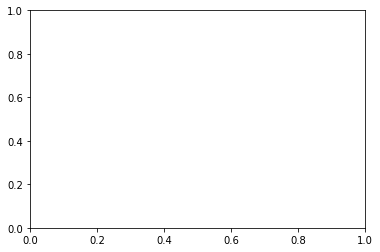

In [53]:
fig, ax = plt.subplots()
x_axis = pivot_df.index.values


In [76]:
y_axis = pivot_df.Capomulin.values
# tv is tumor volume
std_err_tv_df = df1.sem()["Tumor Volume (mm3)"]


AttributeError: 'numpy.float64' object has no attribute 'Drug'

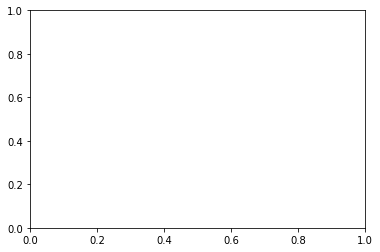

In [59]:
fig, ax = plt.subplots()
x_axis = pivot_df.index.values

y_axis = pivot_df.Capomulin.values
# tv is tumor volume
std_err_tv_df = df1.sem()["Tumor Volume (mm3)"]
standard_errors = std_err_tv_df[std_err_tv_df.Drug == 'Capomulin']['Tumor Volume (mm3)'].values
ax.errorbar(x_axis, y_axis, standard_errors, fmt="o", label='Capomulin', color='red', linestyle='solid')

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc='topleft')




In [52]:
#To set the index to the column value Timepoint
#Multiply by 100 or see what do I have to compute to get that value 
#How to make column names to be the values of a list (lets say your list is df['Drug'].unique())
(Timepoint[20]-Timepoint[0]) 

NameError: name 'Timepoint' is not defined

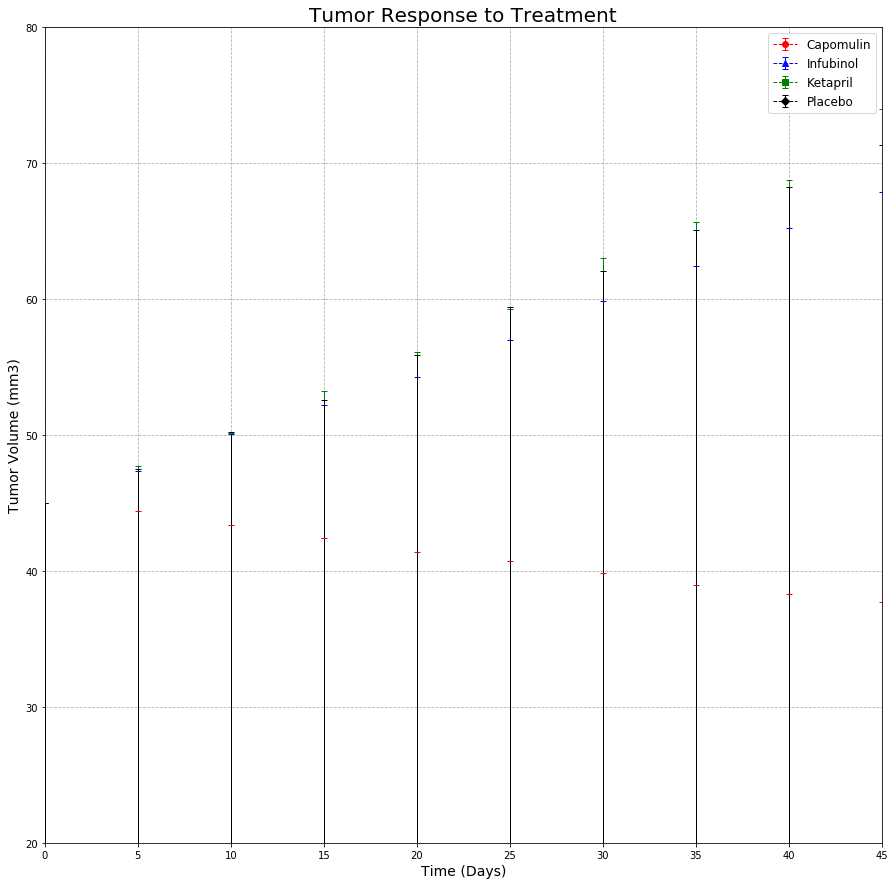

In [114]:
x_axis = [0,5,10,15,20,25,30,35,40,45]
x_limit = 45
plt.figure(figsize=(15,15))

error = df1["Tumor Volume (mm3)"]["Capomulin"]
capumulin_response = plt.errorbar(x_axis, pivot_df["Capomulin"], yerr=error, fmt="o", ls="dashed", linewidth=1, alpha=1, capsize=3,color ="red")

error = df1["Tumor Volume (mm3)"]["Infubinol"]
infubinol_response = plt.errorbar(x_axis, pivot_df["Infubinol"], yerr=error, fmt="^", ls="dashed", linewidth=1, alpha=1, capsize=3,color ="blue")

error = df1["Tumor Volume (mm3)"]["Ketapril"]
ketapril_response = plt.errorbar(x_axis, pivot_df["Ketapril"], yerr=error, fmt="s", ls="dashed", linewidth=1, alpha=1, capsize=3,color = "green")

error = df1["Tumor Volume (mm3)"]["Placebo"]
placebo_response = plt.errorbar(x_axis, pivot_df["Placebo"], yerr=error, fmt="D", ls="dashed", linewidth=1, alpha=1, capsize=3,color = "black")

plt.ylim(20, 80)
plt.xlim(0, 45)

plt.title("Tumor Response to Treatment", fontsize=20)
plt.xlabel("Time (Days)", fontsize=14)
plt.ylabel("Tumor Volume (mm3)", fontsize=14)

plt.grid(linestyle="dashed")
plt.legend((capumulin_response, infubinol_response, ketapril_response, placebo_response), ("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)
plt.savefig("plot.png")
plt.show()

In [94]:
# Generate the Plot (with Error Bars)


# Save the Figure
plt.savefig("plot.png")


<Figure size 432x288 with 0 Axes>

In [ ]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [97]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
df1=merged.groupby(['Drug', 'Timepoint']).mean()
mean_df=df1.drop("Tumor Volume (mm3)", axis=1).reset_index()
mean_df.head()
# Convert to DataFrame


# Preview DataFrame


Drug  Timepoint  Metastatic Sites
0  Capomulin          0          0.000000
1  Capomulin          5          0.160000
2  Capomulin         10          0.320000
3  Capomulin         15          0.375000
4  Capomulin         20          0.652174

In [98]:
combined_sem = merged.groupby(['Drug','Timepoint']).sem()
combined_sem= combined_sem.drop('Tumor Volume (mm3)', axis=1).reset_index()
combined_sem= combined_sem.drop('Mouse ID', axis=1).reset_index()
# Convert to DataFrame
tumor_sem_df = pd.DataFrame(combined_sem)
# Preview DataFrame
tumor_sem_df.head()

index       Drug  Timepoint  Metastatic Sites
0      0  Capomulin          0          0.000000
1      1  Capomulin          5          0.074833
2      2  Capomulin         10          0.125433
3      3  Capomulin         15          0.132048
4      4  Capomulin         20          0.161621

In [99]:
combined_sem = merged.groupby(['Drug','Timepoint']).sem()
combined_sem= combined_sem.drop('Tumor Volume (mm3)', axis=1).reset_index()
combined_sem= combined_sem.drop('Mouse ID', axis=1).reset_index()
# Convert to DataFrame
tumor_sem_df = pd.DataFrame(combined_sem)
# Preview DataFrame
tumor_sem_df.head()

index       Drug  Timepoint  Metastatic Sites
0      0  Capomulin          0          0.000000
1      1  Capomulin          5          0.074833
2      2  Capomulin         10          0.125433
3      3  Capomulin         15          0.132048
4      4  Capomulin         20          0.161621

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [100]:
pivot_df = mean_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
pivot_df.reset_index(level = None, inplace = True)
pivot_df

Drug  Timepoint  Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol   Placebo  \
0             0   0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   
1             5   0.160000  0.380952   0.280000  0.304348  0.260870  0.375000   
2            10   0.320000  0.600000   0.666667  0.590909  0.523810  0.833333   
3            15   0.375000  0.789474   0.904762  0.842105  0.857143  1.250000   
4            20   0.652174  1.111111   1.050000  1.210526  1.150000  1.526316   
5            25   0.818182  1.500000   1.277778  1.631579  1.500000  1.941176   
6            30   1.090909  1.937500   1.588235  2.055556  2.066667  2.266667   
7            35   1.181818  2.071429   1.666667  2.294118  2.266667  2.642857   
8            40   1.380952  2.357143   2.100000  2.733333  2.466667  3.166667   
9            45   1.476190  2.692308   2.111111  3.363636  2.538462  3.272727   

Drug  Propriva  Ramicane  Stelasyn  Zoniferol  
0     0.000000  0.000000  0.000000   0.000000  
1     0.320000  0.120000  0.240000   0.166667  
2     0.565217  0.250000  0.478261   0.500000  
3     0.764706  0.333333  0.782609   0.809524  
4     1.000000  0.347826  0.952381   1.294118  
5     1.357143  0.652174  1.157895   1.687500  
6     1.615385  0.782609  1.388889   1.933333  
7     2.300000  0.952381  1.562500   2.285714  
8     2.777778  1.100000  1.583333   2.785714  
9     2.571429  1.250000  1.727273   3.071429

Drug       Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol    Placebo  \
Timepoint                                                                     
0          45.000000  45.000000  45.000000  45.000000  45.000000  45.000000   
5          44.266086  46.503051  47.062001  47.389175  46.796098  47.125589   
10         43.084291  48.285125  49.403909  49.582269  48.694210  49.423329   
15         42.064317  50.094055  51.296397  52.399974  50.933018  51.359742   
20         40.716325  52.157049  53.197691  54.920935  53.644087  54.364417   

Drug        Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                              
0          45.000000  45.000000  45.000000  45.000000  
5          47.248967  43.944859  47.527452  46.851818  
10         49.101541  42.531957  49.463844  48.689881  
15         51.067318  41.495061  51.529409  50.779059  
20         53.346737  40.238325  54.067395  53.170334

In [102]:
met_table_fourdrugs = pivot_df[['Timepoint', 'Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
met_table_fourdrugs.head()

Drug  Timepoint  Capomulin  Infubinol  Ketapril   Placebo
0             0   0.000000   0.000000  0.000000  0.000000
1             5   0.160000   0.280000  0.304348  0.375000
2            10   0.320000   0.666667  0.590909  0.833333
3            15   0.375000   0.904762  0.842105  1.250000
4            20   0.652174   1.050000  1.210526  1.526316

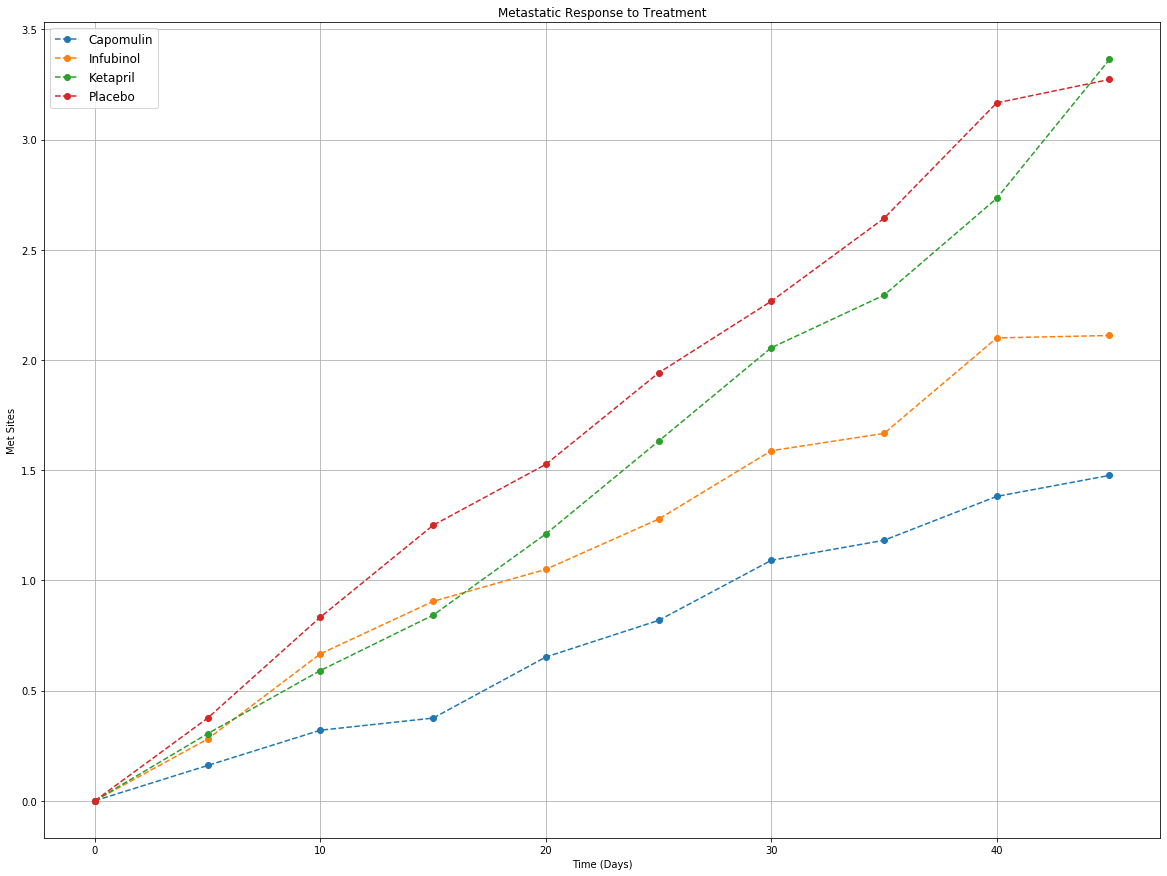

In [107]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure
plt.figure(figsize = (20, 15))
plt.errorbar(x=met_table_fourdrugs['Timepoint'],y=met_table_fourdrugs['Capomulin'], yerr=None, linestyle="--", fmt='o')
plt.errorbar(x=met_table_fourdrugs['Timepoint'],y=met_table_fourdrugs['Infubinol'], yerr=None, linestyle="--", fmt='o')
plt.errorbar(x=met_table_fourdrugs['Timepoint'],y=met_table_fourdrugs['Ketapril'], yerr=None, linestyle="--",fmt='o')
plt.errorbar(x=met_table_fourdrugs['Timepoint'],y=met_table_fourdrugs['Placebo'], yerr=None, linestyle="--", fmt='o')
plt.ylabel('Met Sites')
plt.xlabel('Time (Days)')
plt.title('Metastatic Response to Treatment')
plt.grid()
plt.legend(("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)
plt.savefig('plot2.png')
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [113]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

micecount = merged.groupby(["Drug","Timepoint"]).count()
# Convert to DataFrame
mice_df = pd.DataFrame(micecount["Mouse ID"])
mice_df.reset_index(inplace=True)

mice_df.head()


# Preview DataFrame


Drug  Timepoint  Mouse ID
0  Capomulin          0        25
1  Capomulin          5        25
2  Capomulin         10        25
3  Capomulin         15        24
4  Capomulin         20        23

Drug  Timepoint  Mouse Count
0  Capomulin          0           25
1  Capomulin          5           25
2  Capomulin         10           25
3  Capomulin         15           24
4  Capomulin         20           23

In [115]:
# Minor Data Munging to Re-Format the Data Frames
survival_df = mice_df.pivot(index='Timepoint', columns='Drug', values='Mouse ID')
# Preview the Data Frame
survival_df.head()




Drug       Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol  Placebo  \
Timepoint                                                                
0                 25        25         25        25        25       25   
5                 25        21         25        23        23       24   
10                25        20         21        22        21       24   
15                24        19         21        19        21       20   
20                23        18         20        19        20       19   

Drug       Propriva  Ramicane  Stelasyn  Zoniferol  
Timepoint                                           
0                26        25        26         25  
5                25        25        25         24  
10               23        24        23         22  
15               17        24        23         21  
20               17        23        21         17

Drug       Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol  Placebo  \
Timepoint                                                                
0                 25        25         25        25        25       25   
5                 25        21         25        23        23       24   
10                25        20         21        22        21       24   
15                24        19         21        19        21       20   
20                23        18         20        19        20       19   

Drug       Propriva  Ramicane  Stelasyn  Zoniferol  
Timepoint                                           
0                26        25        26         25  
5                25        25        25         24  
10               23        24        23         22  
15               17        24        23         21  
20               17        23        21         17

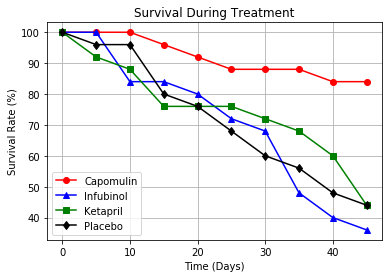

In [120]:
# Generate the Plot (Accounting for percentages)

x_axis = survival_df.index.values

mice_count = survival_df.Capomulin.values[0]
y_axis = survival_df.Capomulin.values / mice_count * 100
plt.plot(x_axis, y_axis, marker='o', label='Capomulin', color='red')

y_axis = survival_df.Infubinol.values / mice_count * 100
plt.plot(x_axis, y_axis, marker='^', label='Infubinol', color='blue')

mice_count = survival_df.Ketapril.values[0]
y_axis = survival_df.Ketapril.values / mice_count * 100
plt.plot(x_axis, y_axis, marker='s', label='Ketapril', color='green')

mice_count = survival_df.Placebo.values[0]
y_axis = survival_df.Placebo.values / mice_count * 100
plt.plot(x_axis, y_axis, marker='d', label='Placebo', color='black')


plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.legend(loc='bottomleft')
plt.grid()
# Save the Figure
plt.savefig("plots3.png")
# Show the Figure
plt.show()



![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)